In [3]:
import pandas as pd    #import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Adjust encoding if needed; 'latin1' is safe for this dataset   ##Load the data
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


Rows: 2823, Columns: 25


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
# Show summary info             ##Data cleaning
df.info()

# Detect missing values
print(df.isnull().sum())

# Drop rows with too many missing essential fields (adjust as needed)
df = df.dropna(subset=['ORDERNUMBER', 'SALES'])

# Remove duplicate rows
df = df.drop_duplicates()

# Convert date field to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
print("Data types after cleaning:")
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
print(df.describe())                         #Summary Statistics
print(df['PRODUCTLINE'].value_counts())
print(df['DEALSIZE'].value_counts())


        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count   2823.000000                           2823  2823.000000  2823.000000   
mean    3553.889072  2004-05-11 00:16:49.989373056     2.717676     7.092455   
min      482.130000            2003-01-06 00:00:00     1.000000     1.000000   
25%     2203.430000            2003-11-06 12:00:0

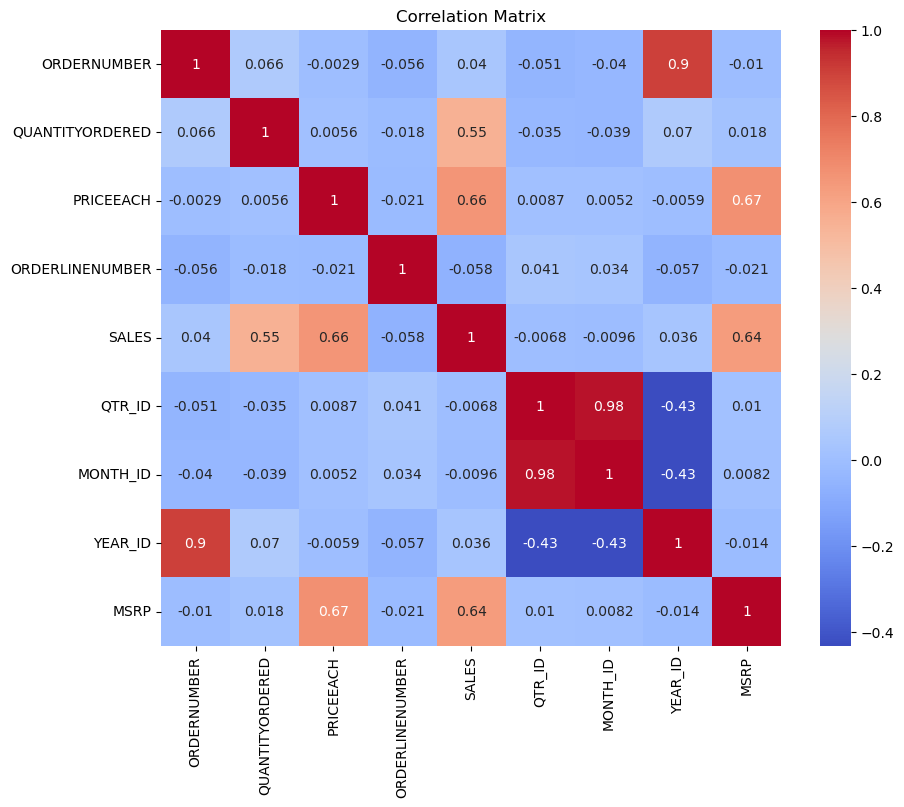

In [13]:
plt.figure(figsize=(10,8))        #Correlation Matrix
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


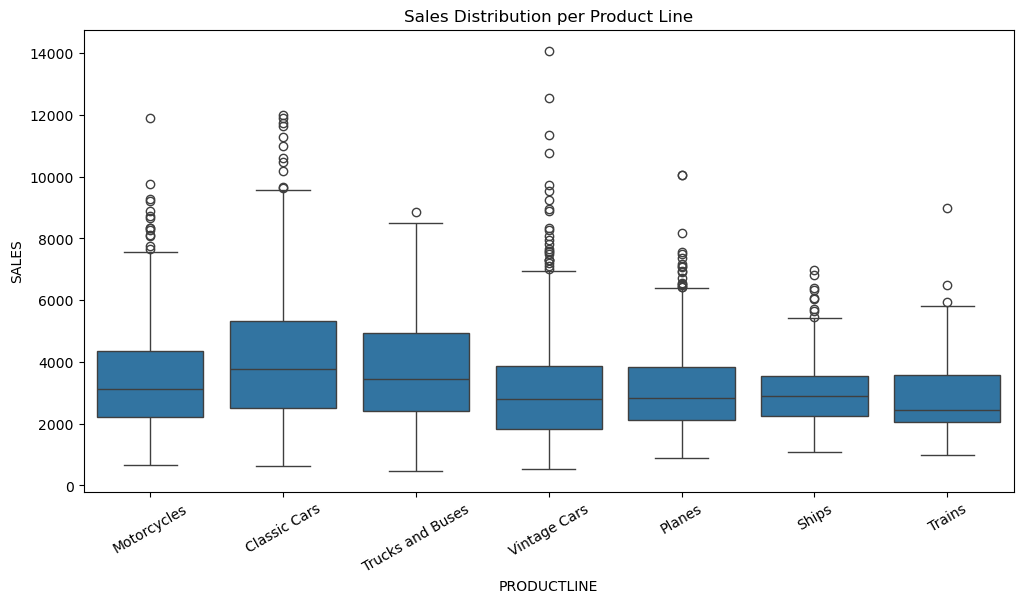

In [15]:
# SALES distribution per product line
plt.figure(figsize=(12,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title("Sales Distribution per Product Line")
plt.xticks(rotation=30)
plt.show()


In [17]:
# Extract date features
df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
df['ORDER_YEAR'] = df['ORDERDATE'].dt.year
df['ORDER_DAY'] = df['ORDERDATE'].dt.day

# Example: Create a profit column if you have MSRP and price
df['EST_PROFIT'] = (df['MSRP'] - df['PRICEEACH']) * df['QUANTITYORDERED']
print(df[['SALES', 'MSRP', 'PRICEEACH', 'QUANTITYORDERED', 'EST_PROFIT']].head())


     SALES  MSRP  PRICEEACH  QUANTITYORDERED  EST_PROFIT
0  2871.00    95      95.70               30      -21.00
1  2765.90    95      81.35               34      464.10
2  3884.34    95      94.74               41       10.66
3  3746.70    95      83.26               45      528.30
4  5205.27    95     100.00               49     -245.00


In [19]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
display(top_customers)


CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64

In [23]:
pivot_region = pd.pivot_table(df, index='TERRITORY', columns='ORDER_YEAR', values='SALES', aggfunc='sum')
display(pivot_region)     ##Sales by region and year


ORDER_YEAR,2003,2004,2005
TERRITORY,,,
APAC,253134.45,345307.83,147679.55
EMEA,1660314.53,2389128.89,929828.99
Japan,243773.18,168479.10,42920.94


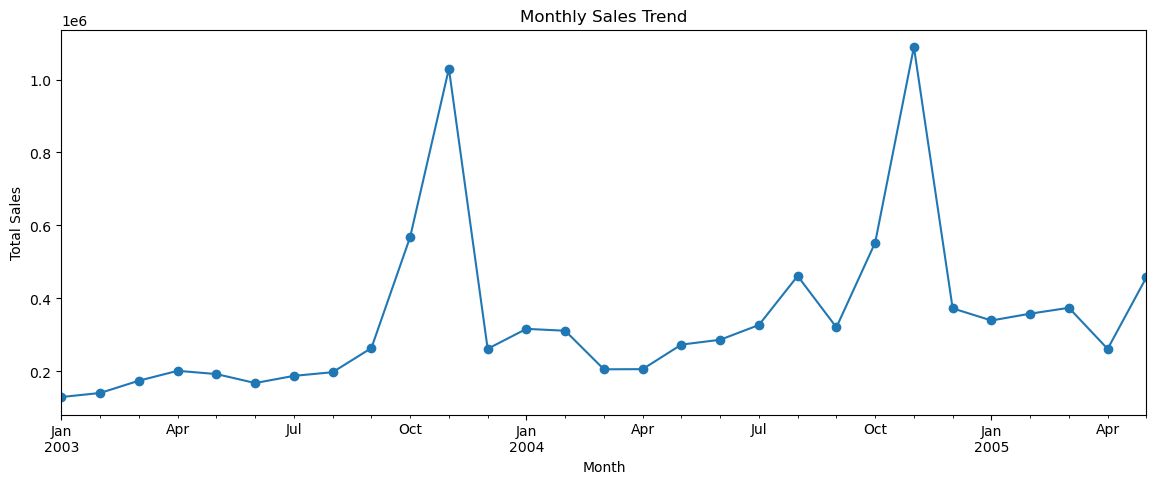

In [27]:
monthly_sales = df.groupby([df['ORDERDATE'].dt.to_period('M')])['SALES'].sum()
monthly_sales.plot(kind='line', figsize=(14,5), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()    #Sales Trend over Time


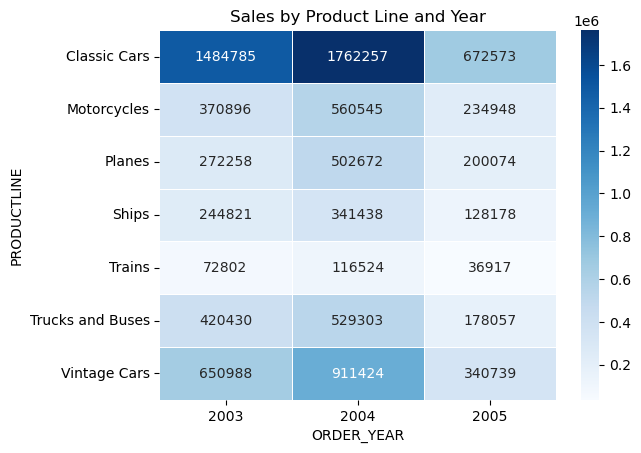

In [29]:
pvt = pd.pivot_table(df, index='PRODUCTLINE', columns='ORDER_YEAR', values='SALES', aggfunc='sum')
sns.heatmap(pvt, annot=True, fmt=".0f", linewidths=.5, cmap="Blues")
plt.title("Sales by Product Line and Year")
plt.show()         #Product Performance Heatmap


In [31]:
# Select features and target   # Predictive Analytics (e.g., Predict Sales Amount)
X = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
y = df['SALES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = LinearRegression()     #Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [35]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))    #Evaluate model
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 1022.3729996570464
R2 Score: 0.7605331377928034


In [37]:
df.to_csv('cleaned_sales_data.csv', index=False)
print("Cleaned data exported as 'cleaned_sales_data.csv'")


Cleaned data exported as 'cleaned_sales_data.csv'


In [39]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 176.0 kB/s eta 0:00:0000:0100:01


In [41]:
# Install XGBoost if not present: !pip install xgboost  # Advanced ML: Tree-Based Sales Prediction (XGBoost)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select additional features (add more as needed)
features = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'ORDERLINENUMBER', 'MONTH_ID', 'YEAR_ID']
df_model = df.dropna(subset=features + ['SALES'])

X = df_model[features]
y = df_model['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4)
model_xgb.fit(X_train, y_train)

preds_xgb = model_xgb.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, preds_xgb)))
print("XGBoost R²:", r2_score(y_test, preds_xgb))


XGBoost RMSE: 697.7637329241002
XGBoost R²: 0.8884567058578261


In [43]:
from sklearn.ensemble import IsolationForest     #Anomaly Detection (IsolationForest)

iso = IsolationForest(contamination=0.01, random_state=1)
df_anomaly = df.dropna(subset=['SALES', 'QUANTITYORDERED', 'PRICEEACH'])
X_iso = df_anomaly[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]
anomaly_pred = iso.fit_predict(X_iso)
df_anomaly['anomaly'] = anomaly_pred

# Show anomalies
anomalies = df_anomaly[df_anomaly['anomaly'] == -1]
print("Anomalous Transactions:")
print(anomalies[['ORDERNUMBER', 'SALES', 'QUANTITYORDERED', 'PRICEEACH']].head())


Anomalous Transactions:
     ORDERNUMBER     SALES  QUANTITYORDERED  PRICEEACH
104        10403  11886.60               66     100.00
131        10400   9661.44               64     100.00
264        10403   8648.64               66     100.00
418        10405   9048.16               97      93.28
598        10407  14082.80               76     100.00


In [47]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:0000:0100:01


22:48:33 - cmdstanpy - INFO - Chain [1] start processing
22:48:33 - cmdstanpy - INFO - Chain [1] done processing


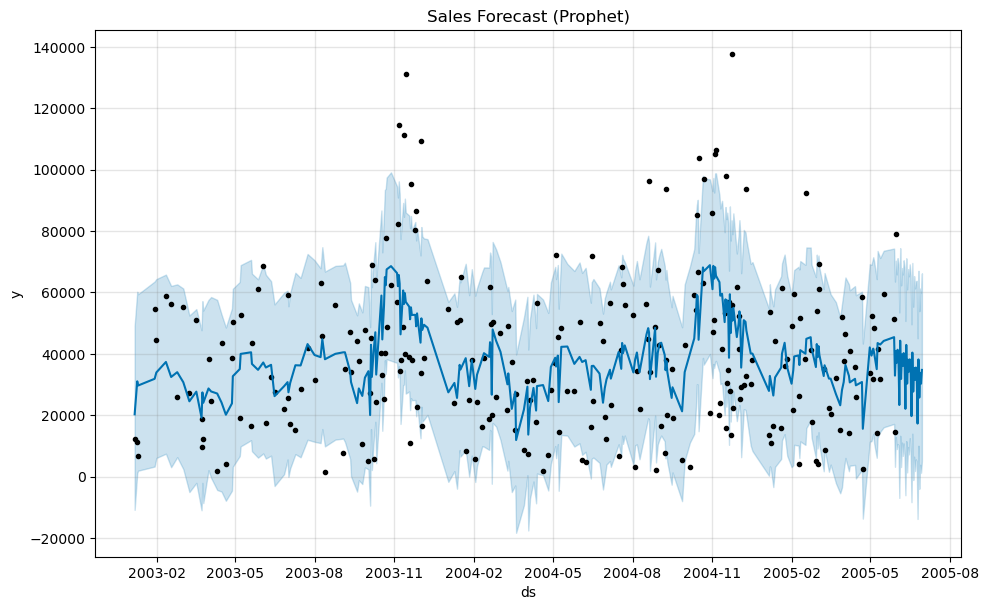

In [49]:
from prophet import Prophet      #Time Series Forecasting (Prophet)

# Aggregate total sales by date
df_ts = df[['ORDERDATE', 'SALES']].dropna()
df_ts = df_ts.groupby('ORDERDATE').sum().reset_index()
df_ts.columns = ['ds', 'y']

# Prophet model
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(df_ts)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Plot
fig = model_prophet.plot(forecast)
plt.title('Sales Forecast (Prophet)')
plt.show()


In [51]:
from sklearn.cluster import KMeans     # Customer Segmentation (KMeans Clustering)

# Customer features: average sales, total orders, avg quantity
customer_feats = df.groupby('CUSTOMERNAME').agg({
    'SALES': ['mean', 'sum'],
    'ORDERNUMBER': 'nunique',
    'QUANTITYORDERED': 'mean'
})
customer_feats.columns = ['SALES_MEAN', 'SALES_TOTAL', 'ORDER_COUNT', 'QTY_MEAN']
customer_feats = customer_feats.fillna(0)

kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(customer_feats)
customer_feats['CLUSTER'] = clusters

# Examine segmentation results
print(customer_feats.groupby('CLUSTER').mean())


          SALES_MEAN    SALES_TOTAL  ORDER_COUNT   QTY_MEAN
CLUSTER                                                    
0        3605.946371  137971.794375     3.625000  35.091805
1        3522.371081  912294.110000    26.000000  36.011583
2        3520.282425   69834.125172     2.551724  34.976631
3        3638.100333  654858.060000    17.000000  35.366667


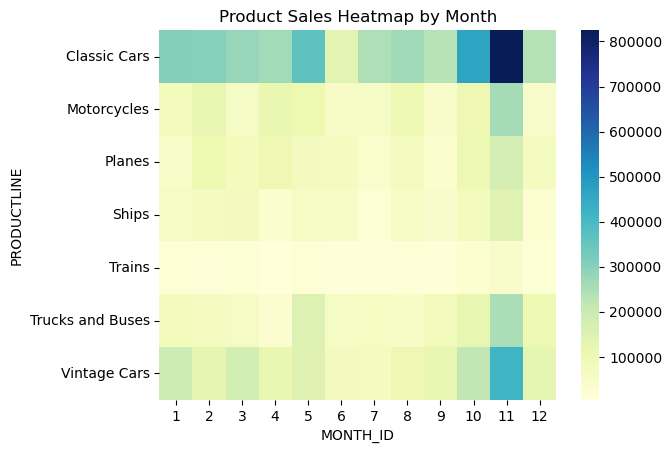

In [53]:
# Monthly product sales heatmap   # Product Segmentation (Pivot + Heatmap)
product_month = pd.pivot_table(df, index='PRODUCTLINE', columns='MONTH_ID', values='SALES', aggfunc='sum')
sns.heatmap(product_month, annot=False, cmap="YlGnBu")
plt.title('Product Sales Heatmap by Month')
plt.show()


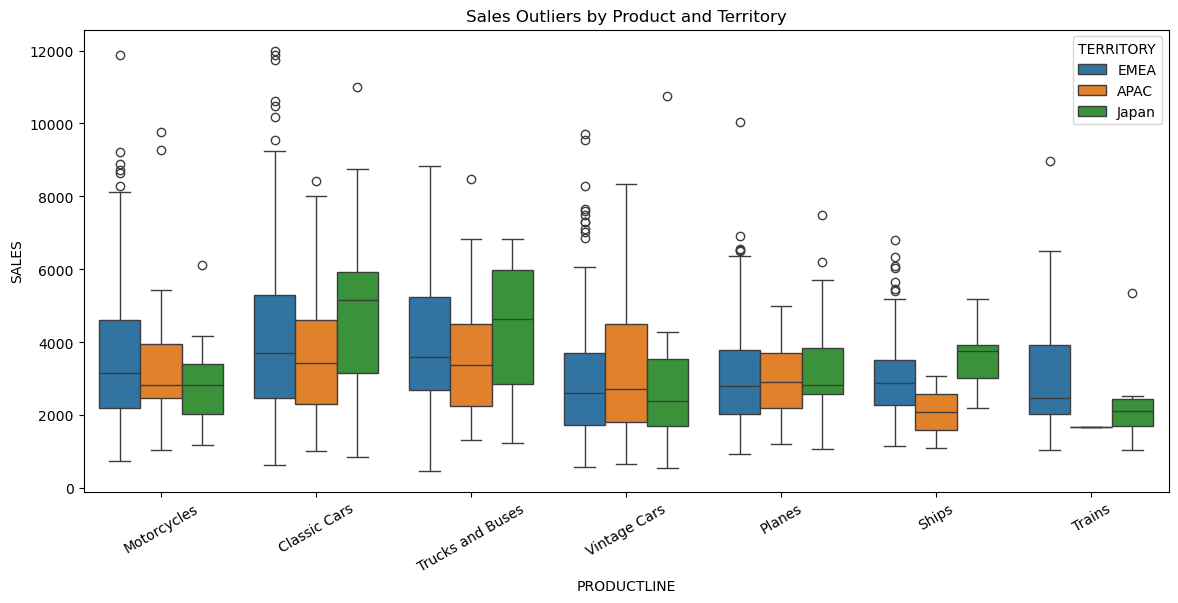

In [55]:
# Boxplot by product and territory    #Outlier Visualization (Boxplots + Scatterplots)

plt.figure(figsize=(14,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, hue='TERRITORY')
plt.title('Sales Outliers by Product and Territory')
plt.xticks(rotation=30)
plt.show()


In [59]:
# Export top 20 customers for executive review  # Automated Reporting (Export Most Important Segments)
top_customers = customer_feats.sort_values('SALES_TOTAL', ascending=False).head(20)
top_customers.to_csv('top_customers.csv')
